In [1]:
import sys
sys.path.append("./../")

# Run the following command to install the required libraries
# !{sys.executable} -m pip install --user -r ./../requirements.txt

In [2]:
import matplotlib.pyplot as plt
import ipywidgets

from src.interface.input import ImspocOptions
from src.characterization.preprocessing import Characterization
from src.interface.imspoc_simulator import HyperspectralImage

## Imspoc simulator

We generate a simulated acquisition of the Imspoc image, from a given characterization of the device. For simplicity, the transfer function is assumed to be the same for each pixel of a given interferometer.

In [3]:
characterization_folder = "../data/characterization/imspoc_uv_2"
device_folder = "../data/device/imspoc_uv_2.json"
hyperspectral_folder = "../data/hyperspectral/color_checker"
rgb = (70, 53, 19)

device = ImspocOptions.parse_file(device_folder)
hyperspectral = HyperspectralImage.load(hyperspectral_folder)
characterization = Characterization.load(characterization_folder)
imspoc = hyperspectral.to_imspoc(
    device=device,
    characterization=characterization,
)

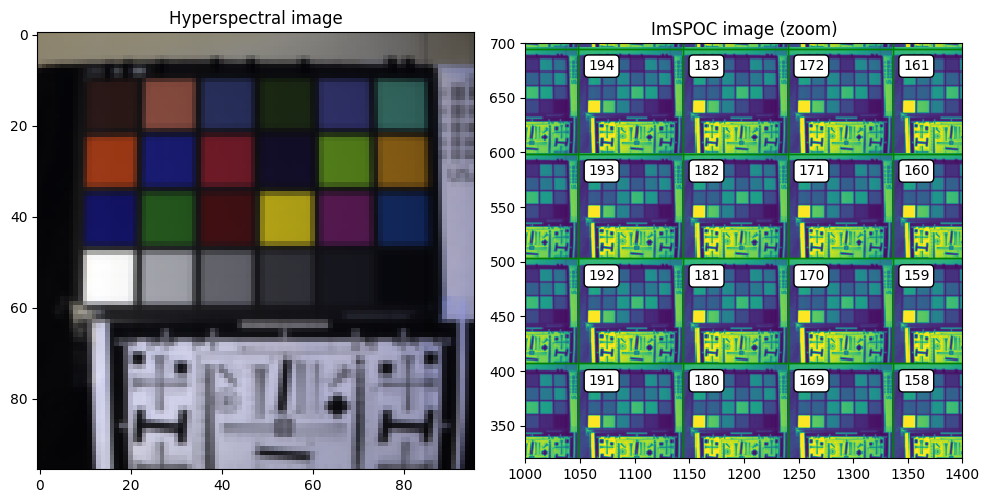

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))

hyperspectral.visualize(rgb=rgb, figure=(fig, ax[0]))
imspoc.visualize(figure=(fig, ax[1]))
cube = imspoc.cube() # Returns the subimages stacked as a datacube
ax[0].set_title("Hyperspectral image")
ax[1].set_title("ImSPOC image (zoom)")
ax[1].set_xlim((1000, 1400))
ax[1].set_ylim((320, 700))
fig.tight_layout()

plt.show()

## Visualization
We provide here a slider to scroll over the original hyperspectral image and the simulated ImSPOC datacube, in order to check how the original spectra are transformed into the corresponding interferogram.

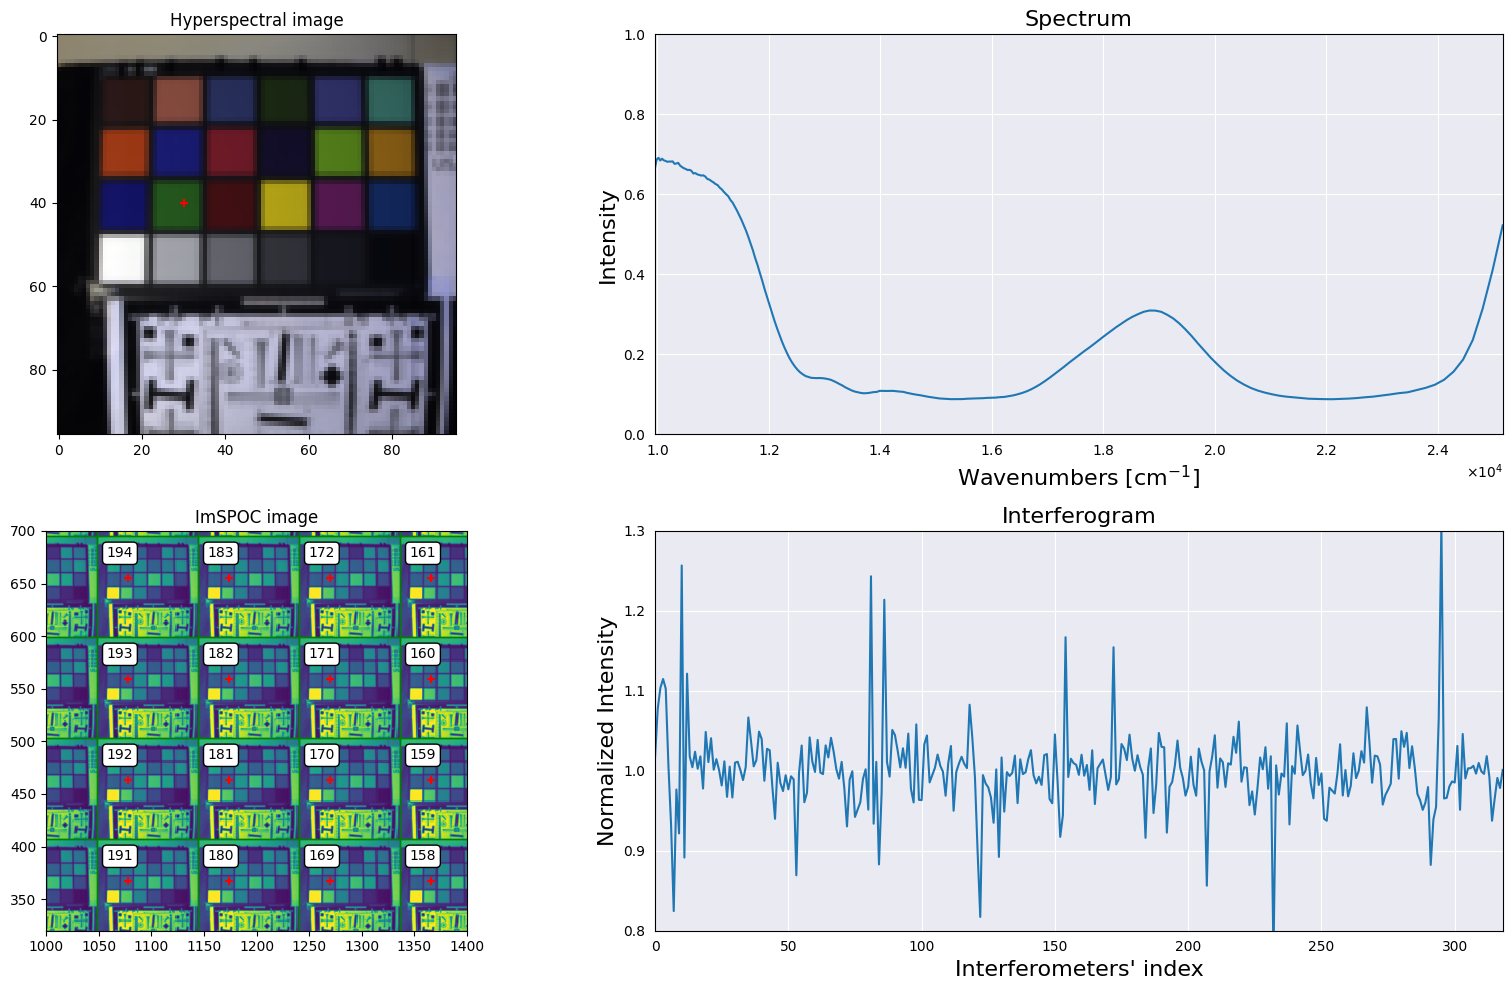

In [5]:
def imspoc_visualization(hyperspectral, imspoc, point_x=30, point_y=40):
    point = (point_y, point_x)
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(17, 10))
    hyperspectral.visualize(rgb=rgb, point=point, figure=(fig,ax[0,0]))
    hyperspectral.visualize_spectrum(point=point, figure=(fig,ax[0,1]))
    imspoc.visualize(points=[point], figure=(fig, ax[1,0]))
    imspoc.visualize_interferogram(point=point, figure=(fig, ax[1,1]))
    ax[0, 0].set_title("Hyperspectral image")
    ax[1, 0].set_title("ImSPOC image")
    ax[1, 0].set_xlim((1000, 1400))
    ax[1, 0].set_ylim((320, 700))
    ax[0, 1].set_ylim([0, 1])
    ax[1, 1].set_ylim([0.8, 1.3])
    fig.tight_layout()
    plt.show()

# Fixed visualizetion
imspoc_visualization(hyperspectral=hyperspectral, imspoc=imspoc)

# # Slider visualization
# parameters_range = {
#     "point_x": (0, 95, 1),
#     "point_y": (0, 95, 1),
# }
# ipywidgets.interact(
#     imspoc_visualization, 
#     hyperspectral=ipywidgets.fixed(hyperspectral), 
#     imspoc=ipywidgets.fixed(imspoc), 
#     **parameters_range
# );